# Introduction

I recently read _The Uninhabitable Earth_ by David Wallace_Wells. The data are indisputable, but visualizing some of that data might help shore up our understanding of climate change. This notebook is also a test for me to show my plotly and data analysis skills.

<br />

1. General Climate Change Patterns


2. Finding a turning point (naive)


3. By Geography

In [3]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

# Plotly
!pip install chart-studio
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1. Data by year, overall temperature changes

    * Reading and clean data
    * Create new features (day, month, year etc.)
    * Analysing distribution of data in time to assess how to better analyse the numbers

In [4]:
data = pd.read_csv("./sample_data/GlobalTemperatures.csv")

# Make a copy of the data for future graphs
copy = data.copy()

data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


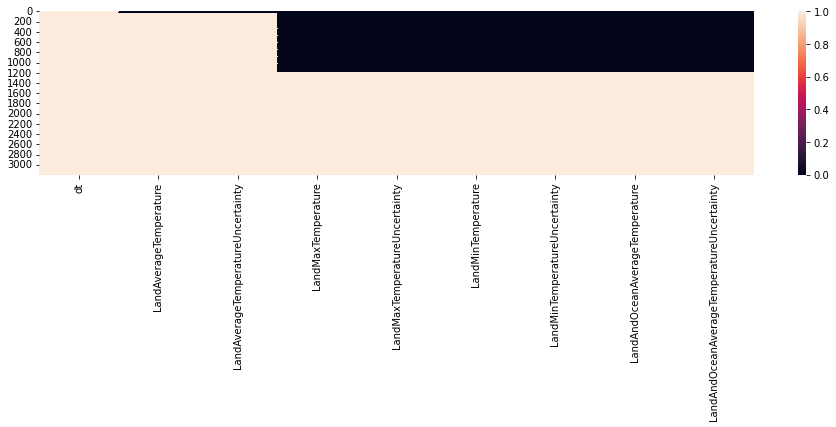

In [5]:
# Missing values
data.isna().sum() # there are 1200 missing values for Max, Min and Land&Ocean Average Temp
plt.figure(figsize = (16, 3))
sns.heatmap(~data.isna())

In [6]:
# Missing data with listwise deletion
# Because data is missing in chucks and we are dealing with time series data, we will delete all rows that have at least 
# one missing value.

data.dropna(axis = 0, inplace = True)


# Dealing with the DATE
data['Date'] = pd.to_datetime(data.dt) # converted all dates to the same format

data2 = data.copy() # create a new dataset
data2.drop(columns = ['dt'], axis = 1, inplace = True) # drop the dt column

# Creating new features
data2['day'] = data2['Date'].dt.day
data2['week'] = data2['Date'].dt.week
data2['month'] = data2['Date'].dt.month
data2['year'] = data2['Date'].dt.year

data2.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  app.launch_new_instance()


,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Date,day,week,month,year
1200,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850-01-01,1,1,1,1850


In [7]:
# Check date distribution after dropping na
def print_distribution(df, col):
  print(col + ' distribution: ')
  print(df[col].value_counts())
  print("\n")

# for i in ['day', 'week', 'month', 'year']:
#   print_distribution(data2, i)

# Week distribution is very uneven, so work on annual data with averages
earth_data = data2.groupby(by = 'year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']].mean().reset_index()

# 1.1 Summary Statistics

In [8]:
# Look at dataset, now we have 166 averages (1 per year)
earth_data.describe()

,year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,1932.500000,8.571583,0.276663,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,48.064193,0.473687,0.208560,0.447741,0.549759,0.614124,0.406697,0.298629,0.071441
min,1850.000000,7.558583,0.062083,13.081000,0.078500,1.525083,0.102500,14.740083,0.047500
25%,1891.250000,8.195708,0.094333,14.055917,0.139542,2.262562,0.149896,14.991208,0.062937
50%,1932.500000,8.540750,0.240625,14.307708,0.240125,2.734917,0.274667,15.144208,0.123625
75%,1973.750000,8.791250,0.341958,14.539167,0.508000,3.126833,0.437000,15.379104,0.150229
max,2015.000000,9.831000,0.918250,15.572667,2.619250,4.148833,1.778500,16.058583,0.316417


# 1.2 Plotly

`LandAverageTemperature` had far fewer missing values, so plot this back in time.

* `Land Average Temperature` began with high variation and uncertainty, until the early-mid 1800s, where we started to see a steady increase _(around the second industrial revolution)_. 
* Sometime between 1950 and 2000, this increase seems to accelerate _(around the third industrial revolution)_.

In [9]:
# Creating the dataset - using copy
copy['Date'] = pd.to_datetime(copy.dt)
copy['year'] = copy['Date'].dt.year
land_avg = copy.groupby('year')['LandAverageTemperature', 'LandAverageTemperatureUncertainty'].mean().reset_index()

# Creating the graph
fig = go.Figure()
fig.update_layout(title="Land Average Temperature: 1750-2010", title_font_size = 20, font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'))

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperatureUncertainty'], mode = 'lines',
                        name = 'Land Avg Temp Error', marker_color = 'rgb(107,142,35)'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


# 2. What was the turning point for global warming?

The temperature increase in both land and ocean are similar. As I mentioned, the third industrial revolution in the 1970s contributed to this increase. But, we also saw a population increase from ~2.5 billion in 1950 to 5 billion in 2000, contributed in part by the innovative Haber-Bosch process noted by (Vaclav Smil and) Bill Gates in his book, _How to Avoid a Climate Disaster_. 

In [10]:
# Figure layout
fig = make_subplots(rows=2, cols=2)
fig.update_layout(title="What was Global Warming's turning point?",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

# Figure data
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[7.5, 10], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 1)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMinTemperature'], mode = 'lines',
                        name = 'Land Min Temp', marker_color='rgb(210,105,30)'), row = 1, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[1.5, 4.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 2)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMaxTemperature'], mode = 'lines',
                        name = 'Land Max Temp', marker_color='rgb(135,206,235)'), row = 2, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[13, 15.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 1)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAndOceanAverageTemperature'], mode = 'lines',
                        name = 'Land&Ocean Avg Temp', marker_color='rgb(107,142,35)'), row = 2, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[14.5, 16], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 2)

# 2.2. Change in Average Temperature before/after 1975

1975 Looks like a nice, even year to use as a turning point for temperature increase.

* Land Average Temperature - an increase from 8.37 degrees to 9.20, almost 1 degree
* Land Minimum Temperatures - an increase from 2.45 degrees to 3.59, increase of 1.14 degrees
* Land Maximum Temperature - an increase from 14.18 degrees to 14.90, 0.72 degrees increase
* Land and Ocean Average Temperature - an increase from 15.08 degrees to 15.62, 0.54 degrees increase

Minimum temperatures are increasing more than maximum temperatures. [This report](https://www.sciencedaily.com/releases/2016/03/160310080530.htm) has some guesses as to why.

In [11]:
# Change in average temperature before/after 1975

# Create a turnpoint column with 1975 as the year
earth_data['turnpoint'] = np.where(earth_data['year'] <= 1975, 'before', 'after')
earth_data.head(2)

# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Average Temperatures before and after 1975",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')

# Figure data
fig.add_trace(go.Box(x = earth_data['LandAverageTemperature'], y = earth_data['turnpoint'], boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(128, 0, 0)', boxmean = True, name = 'Land Avg Temp'),
             row = 1, col = 1)
fig.add_trace(go.Box(x = earth_data['LandMinTemperature'], y = earth_data['turnpoint'], boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(210,105,30)', boxmean = True, name = 'Land Min Temp'),
             row = 1, col = 2)
fig.add_trace(go.Box(x = earth_data['LandMaxTemperature'], y = earth_data['turnpoint'], boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(135,206,235)', boxmean = True, name = 'Land Max Temp'),
             row = 2, col = 1)
fig.add_trace(go.Box(x = earth_data['LandAndOceanAverageTemperature'], y = earth_data['turnpoint'], boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(107,142,35)', boxmean = True, name = 'Land&Ocean Avg Temp'),
             row = 2, col = 2)


fig.update_traces(orientation='h')

# 3. Data by Geography
One crucial point of _The Uninhabitable Earth_ is that climate change affects some geographies more than others. Let's see this in action.

In [53]:
# Read the file (countries + cities)
countries = pd.read_csv("./sample_data/GlobalLandTemperaturesByCity.csv", on_bad_lines='skip')
countries['AverageTemperature'] = pd.to_numeric(countries['AverageTemperature'], errors='coerce')
countries['AverageTemperatureUncertainty'] = pd.to_numeric(countries['AverageTemperatureUncertainty'], errors='coerce')

# Because the file is very big and there are many dates missing (like the last file), we will group by year
countries['Date'] = pd.to_datetime(countries['dt'])
countries['year'] = countries['Date'].dt.year

# Group by year
by_year = countries.groupby(by = ['year', 'City', 'Country', 'Latitude', 'Longitude'])[["AverageTemperature","AverageTemperatureUncertainty"]].mean().reset_index()


# Append the continent & iso codes
continent_map = pd.read_csv("./sample_data/continents2.csv")
continent_map['Country'] = continent_map['name']
continent_map = continent_map[['Country', 'region', 'alpha-2', 'alpha-3']]

# Add information
data = pd.merge(left = by_year, right = continent_map, on = 'Country', how = 'left')

# Filter starting 1825 - because some countries weren't monitored before this year on some periods, 
# the mean overall could be quite misleading (example: Americas have an increase from 1821 to 1825 of 5 points in temperature,
# but this happens only because in 1824 data for South America started to be collected)
data = data[data['year'] >= 1825]

# Datasets:

region = data.dropna(axis = 0).groupby(by = ['region', 'year']).mean().reset_index()
countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year']).mean().reset_index()
cities = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'City', 'year', 'Latitude', 'Longitude']).mean().reset_index()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.



# 3.1 Plotly, Continents Increase in Average Temperature
There are some variations at the beginning because of inconsistent info in some countries in some continents.

But, all continents look to have increased in Temperature in about the same pace. As we might have expected, continents with higher concentrations of richer countries do not show the highest temperatures on this chart. Some northern European countries, for instance, may benefit from longer growth seasons thanks to temperature increase.

In [31]:
# Figure layout
fig = make_subplots(rows=1, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Continents increase in Average Temperature", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

#============================= Scatter =============================
fig.add_trace(go.Scatter(x = region[region['region'] == 'Europe']['year'], y = region[region['region'] == 'Europe']['AverageTemperature'], mode = 'lines',
                        name = 'Europe', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Americas']['year'], y = region[region['region'] == 'Americas']['AverageTemperature'], mode = 'lines',
                        name = 'Americas', marker_color='rgb(210,105,30)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Asia']['year'], y = region[region['region'] == 'Asia']['AverageTemperature'], mode = 'lines',
                        name = 'Asia', marker_color='rgb(135,206,235)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Africa']['year'], y = region[region['region'] == 'Africa']['AverageTemperature'], mode = 'lines',
                        name = 'Africa', marker_color='rgb(107,142,35)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Oceania']['year'], y = region[region['region'] == 'Oceania']['AverageTemperature'], mode = 'lines',
                        name = 'Oceania', marker_color='rgb(70,130,180)'), row = 1, col = 1)

#============================= Bar =============================
y1 = np.round(region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 1)
y2 = np.round(region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 1)

fig.add_trace(go.Bar(x = region['region'].unique(), y = region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 
                     name = 'Mean Temp', marker_color = 'rgb(188,143,143)', text = y1, textposition = 'auto'),
              row = 1, col = 2)
fig.add_trace(go.Bar(x = region['region'].unique(), y = region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 
                     name = 'Max Temp', marker_color = 'rgb(222,184,135)', text = y2, textposition = 'auto'),
              row = 1, col = 2)

# 3.2 Ranking countries by temperature increase

Many conclusions can be drawn from these data, but here are a couple of thoughts based on my limited knowledge:
* Central American countries and Northern South American countries have very high levels of deforestation
* Central Asian countries face some of the worst droughts in the world

In [32]:
# Data
mean = countries.groupby(['Country', 'region'])['AverageTemperature'].mean().reset_index()
maximum = countries.groupby(['Country', 'region'])['AverageTemperature'].max().reset_index()

difference = pd.merge(left = mean, right = maximum, on = ['Country', 'region'])
difference['diff'] = difference['AverageTemperature_y'] - difference['AverageTemperature_x']

# Graph
fig = go.Figure()
fig.update_layout(title="Difference in Temperature (Countries)", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=13,color="#7f7f7f"),
                  template = "ggplot2", autosize = False, height = 3500, width = 750)
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

sort_diff = difference[['Country', 'region', 'diff']].sort_values(by = 'diff', ascending = True)
fig.add_trace(go.Bar(x = sort_diff['diff'], y = sort_diff['Country'], orientation = 'h',
                    marker=dict(color='rgb(222,184,135)', line=dict( color='rgb(188,143,143)', width=0.6))))
fig.show()

# 3.3 Plotly Maps
a. Interactive Global Map - Temperature increase over the years[link text](https://)

In [37]:
# Data - we need iso alpha-3 codes
map_countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year','alpha-3']).mean().reset_index()
map_countries.head()

,region,Country,year,alpha-3,AverageTemperature,AverageTemperatureUncertainty
0,Africa,Algeria,1825,DZA,17.642750,2.168750
1,Africa,Algeria,1826,DZA,17.461233,2.140183
2,Africa,Algeria,1827,DZA,17.456433,2.193283
3,Africa,Algeria,1828,DZA,17.902917,2.200283
4,Africa,Algeria,1829,DZA,17.311133,2.390317


In [46]:
# Min temperature is -6.4524, and because the size in a map cannot be negative, we will add 6.5 to all temperatures
# to "standardize the data"
map_countries['AverageTemperature'] = map_countries['AverageTemperature'] + 6.5

fig = px.scatter_geo(map_countries, locations='alpha-3', color='region',
                     color_discrete_sequence = ('rgb(128,0,0)','rgb(210,105,30)','rgb(135,206,235)','rgb(107,142,35)'),
                     hover_name="Country", size="AverageTemperature", size_max=15, opacity = 0.8,
                     animation_frame="year",
                     projection="natural earth", title='Interactive Global Map - Temperature increase')
fig.show()

b. Global Map - difference between the mean and maximum temperature

* bubbles = countries
* color of bubbles = the mean temperature
* size of bubbles = temperature increase

Result: biggest temperature changes were in Europe, South America, and Central Asia.

In [47]:
# Calculating the difference column
mean = map_countries.groupby(['region','Country','alpha-3'])['AverageTemperature'].mean().reset_index()
maximum = map_countries.groupby(['region','Country','alpha-3'])['AverageTemperature'].max().reset_index()
difference = pd.merge(left = mean, right = maximum, on = ['region','Country','alpha-3'])
difference['diff'] = difference['AverageTemperature_y'] - difference['AverageTemperature_x']
difference.rename(columns = {'AverageTemperature_y':'Maximum Average Temperature',
                             'AverageTemperature_y':'Overall Avg Temp'}, inplace = True)

# Figure
fig = px.scatter_geo(difference, locations="alpha-3", color="Overall Avg Temp",
                     hover_name="Country", size="diff", size_max=15,
                     projection="natural earth", opacity = 0.8,
                     color_continuous_scale=('#283747', '#2874A6', '#3498DB', '#F5B041', '#E67E22', '#A93226'),
                     title = 'Global Map - difference between the mean and max temperatures')
fig.show()

# 3.4 Looking at India

As David Wallace-Wells says, most of the effects of climate change will fall on the shoulders of India. Naturally, this affects me personally. Let's take a look at the data.

Take a look at the increase in average temperature given already high average temperatures. This is despite a huge decrease in air quality over the same period, which we know mitigates the effects of climate change.

In [161]:
# Get states data
states = pd.read_csv("./sample_data/GlobalLandTemperaturesByState.csv", on_bad_lines='skip')
states['AverageTemperature'] = pd.to_numeric(states['AverageTemperature'], errors='coerce')
states['AverageTemperatureUncertainty'] = pd.to_numeric(states['AverageTemperatureUncertainty'], errors='coerce')

# Because the file is very big and there are many dates missing (like the last file), we will group by year
states['Date'] = pd.to_datetime(states['dt'])
states['year'] = states['Date'].dt.year

# Group by year
states_by_year = states.groupby(by = ['year', 'State', 'Country'])[["AverageTemperature","AverageTemperatureUncertainty"]].mean().reset_index()

In [162]:
# Look specifically at India
india = states_by_year[states_by_year['Country'] == 'India']
india = india[~india['AverageTemperature'].isna()]
states_list = india.State.unique()

# Fill in rows with no data with 0 so the visualization works
india_fixed = india.copy()
for year in india_fixed.year.unique():
  for state in states_list:
    if len(india_fixed[(india_fixed['year'] == year) & (india_fixed['State'] == state)]) == 0:
      india_fixed.loc[len(india_fixed.index)] = [year, state, 'India', india_fixed[india_fixed['State'] == state]['AverageTemperature'].mean(), 0] 

india_fixed = india_fixed.sort_values(by=['year'])

# for state in states_list:
#   m = india_fixed[india_fixed['State'] == state]['AverageTemperature'].max()
#   print(state, m)

In [163]:


# Average temperature in India over time
fig = px.choropleth(
    india_fixed,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State',
    color='AverageTemperature',
    range_color=[20,30],
    color_continuous_scale='Reds',
    animation_frame="year"
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()